# Data Exploration
we can first start by examining our existing data somewhat. For that, we first load our csv file into pandas. We start by installing and loading dependencies

In [60]:
%pip install tensorflow
%pip install distutils
%pip install pandas
%pip install numpy
%pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for distutils
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the 

In [61]:
# %load_ext tensorboard

In [62]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [63]:
import tensorflow as tf

print(tf.__version__)

2.18.0


In [64]:
import src.model_training as model_t

In [65]:
data = pd.read_csv("data/data_impure.csv", delimiter="|")
data

,journal_num,text,class
0,92,A Bill for the more effectual preventing Cland...,Reading of a Bill
1,92,PETITION of several Persons whose names are th...,Petition for leave to bring bill
2,92,Sir John Beckett presented a Bill for inclosin...,Reading of a Bill
3,92,Lord Russell presented a Bill for inclosing an...,Reading of a Bill
4,92,"A Petition of Hand-loom Weavers of Longtown, p...",Reading of a Petition
...,...,...,...
195,146,"Resolved, That if \n it \n shall appear that a...",Resolution
196,146,"Resolved, That if it \n shall appear that any ...",Resolution
197,146,"Resolved, That an humble Address be pre- Qwen'...",Resolution
198,146,"Ordered, That all Members who are returned \n ...",Order


As you can see, we have 200 columns of data, consisting mostly of a "text" field and a "class". Lets take a closer look at class.

In [66]:
class_names = data["class"].unique()
print(
    class_names, 
    len(class_names)
    )

['Reading of a Bill' 'Petition for leave to bring bill'
 'Reading of a Petition' 'Reading of a Report'
 'Motion for leave to bring Bill' 'Order' 'Motion withdrawn'
 'Adjournment of Debate' 'Appointment of Committees' 'Resolution'
 'Petition' 'Division of the House' 'Message from Royalty or Lords'] 13


As you can see, our current "class" field contains 13 different class names. We saved their names into the Array `class_names`.

# Model creation

accordingly, we can start building our Neural Net Model. If you paid attention earelier, we loaded a helper library.

First, we need to prepare our data for training the Neural Net. For that, we split our data into a validation and training data set. To facilitate this, tensorflow recommends implementing your data in a folder structure like:
```
- data/
|- class1/
 |- text.txt
|- class2/
...
```

In [67]:
# create folderstructure
for class_name in class_names:
    class_dir = Path(f"data/dataset/{class_name}")
    class_dir.mkdir(parents=True, exist_ok=True)

# create data
for index, row in data.iterrows():
    print(index, row)
    with open(f"data/dataset/{row["class"]}/{index}.txt", "w") as f:
        f.write(row[1])



'# create folderstructure\nfor class_name in class_names:\n    class_dir = Path(f"data/dataset/{class_name}")\n    class_dir.mkdir(parents=True, exist_ok=True)\n\n# create data\nfor index, row in data.iterrows():\n    print(index, row)\n    with open(f"data/dataset/{row["class"]}/{index}.txt", "w") as f:\n        f.write(row[1])\n\n    '

next, we load this data into a usable dataset by using `tf.keras.utils.text_dataset_from_directory`

In [68]:
seed = 101
tf_train_data = tf.keras.utils.text_dataset_from_directory("data/dataset", batch_size=32, validation_split=0.3, subset='training', seed=seed)
tf_val_data = tf.keras.utils.text_dataset_from_directory("data/dataset", batch_size=32, validation_split=0.3, subset='validation', seed=seed)

Found 58 files belonging to 14 classes.
Using 41 files for training.
Found 58 files belonging to 14 classes.
Using 17 files for validation.


Now, we can take a look at our generated data

In [69]:
for text_batch, label_batch in tf_train_data.take(1):
  for i in range(10):
    print("Text: ", text_batch.numpy()[i])
    print("Label:", label_batch.numpy()[i])

Text:  b'Ordered, That Mr. Stephenson, Mr. Locke and Mr. Fitzroy be added to the Select Committee on Ventilation and Lighting of the House.'
Label: 1
Text:  b"A Petition of Land-owners in the counties of Sur- London and \\n rey and Sussex, and Inhabitants of London, \\n B \\n Croydon Brighton \\n Reigate, in the county of Surrey, and \\n Brighton, \\n Br \\n Line \\n nail- \\n and \\n - \\n . \\n in the county of Sussex, for leave to bring in a Bill for \\n making a Railway communication between the Me- \\n tropolis and the towns of Brighton, Shoreham, Lewes, \\n and the port of Newhaven, was presented, and read ; \\n and ordered to lie upon the Table. \\n A Petition of Trustees for executing the Act for Lobley Hill \\n repairing the Road from the Turnpike Road between Road. \\n Gateshead and Hexham, and Lobley Hill, in the \\n County of Durham, to Burtryford, in the Parish of \\n Stanhope, in the same County, together with several \\n Branches therefrom, for leave to bring in a Bill f

In [70]:
for i, label in enumerate(tf_train_data.class_names):
  print("Label", i, "corresponds to", label)

Label 0 corresponds to Adjournment of Debate
Label 1 corresponds to Appointment of Committees
Label 2 corresponds to Division of the House
Label 3 corresponds to Message from Royalty or Lords
Label 4 corresponds to Motion for leave to bring Bill
Label 5 corresponds to Motion for leave to bring in a Bill
Label 6 corresponds to Motion withdrawn
Label 7 corresponds to Order
Label 8 corresponds to Petition
Label 9 corresponds to Petition for leave to bring bill
Label 10 corresponds to Reading of a Bill
Label 11 corresponds to Reading of a Petition
Label 12 corresponds to Reading of a Report
Label 13 corresponds to Resolution


Next, we can start the vectorisation of our training data. For this, we again get a vectorisation layer from our helber library, and then train it on our data!

In [71]:
vectorize_layer = model_t.create_vec_layer()

# Make a text-only dataset (without labels), then call adapt
train_text = tf_train_data.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

We can now test our vectorisation

In [72]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

text_batch, label_batch = next(iter(tf_train_data))
first_review, first_label = text_batch[0], label_batch[0]
print("Text", first_review)
print("Class", tf_train_data.class_names[first_label])
print("Vectorized Text", vectorize_text(first_review, first_label))

Text tf.Tensor(b'Ordered, That leave be given to bring in a Bill to enable Her Majesty to carry into effect Arrangements made with Foreign Powers for the Apprehension of Seamen who desert from their Ships.', shape=(), dtype=string)
Class Motion for leave to bring in a Bill
Vectorized Text (<tf.Tensor: shape=(1, 500), dtype=int64, numpy=
array([[  16,   10,   31,   13,  135,    6,   29,    7,    9,   24,    6,
         189,  270,   28,    6, 1281,   85,  603, 1317,   66,   41,  400,
         127,    8,    3, 1320,    4,  994,  115, 1223,   34,   49,  982,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  

In [73]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 113 ---> ",vectorize_layer.get_vocabulary()[113])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  buckingham
 113 --->  alter
Vocabulary size: 1365


# Training the Model

Now we can convert our data using the vectorisation and finally start creating and training our model

In [74]:
train_data = tf_train_data.map(vectorize_text)
val_data = tf_val_data.map(vectorize_text)
test_data = tf_train_data.map(vectorize_text)

In [75]:
len(class_names)

13

In [76]:
model_init = model_t.init_model(output_amount=len(class_names)+1)

model_init.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [77]:
model, history = model_t.train_model(model_init, train_data, val_data, epochs=25)

model.summary()

Epoch 1/25


/home/sebastianfath/projects/dh-parlproc/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.0429 - loss: 2.6361 - val_accuracy: 0.2353 - val_loss: 2.6451
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2043 - loss: 2.6060 - val_accuracy: 0.2353 - val_loss: 2.6533
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2726 - loss: 2.5784 - val_accuracy: 0.2353 - val_loss: 2.6617
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2193 - loss: 2.5572 - val_accuracy: 0.2353 - val_loss: 2.6700
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2889 - loss: 2.5339 - val_accuracy: 0.2353 - val_loss: 2.6793
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2251 - loss: 2.5393 - val_accuracy: 0.2353 - val_loss: 2.6887
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2193 - loss: 2.5069 - val_accuracy: 0.2353 - val_loss: 2.6980
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2355 - loss: 2.4839 - val_accuracy: 0.2353 - val_loss: 2.7054
Epoch 9/25

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, None, 16)       │     1,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, None, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 14)             │           238 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,800,716 (18.31 MB)

 Trainable params: 1,600,238 (6.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,200,478 (12.21 MB)

# Analyse and Eval Training and Model

In [78]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

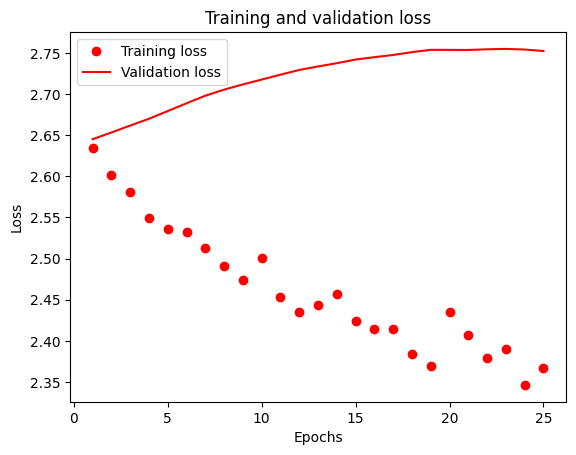

In [79]:


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

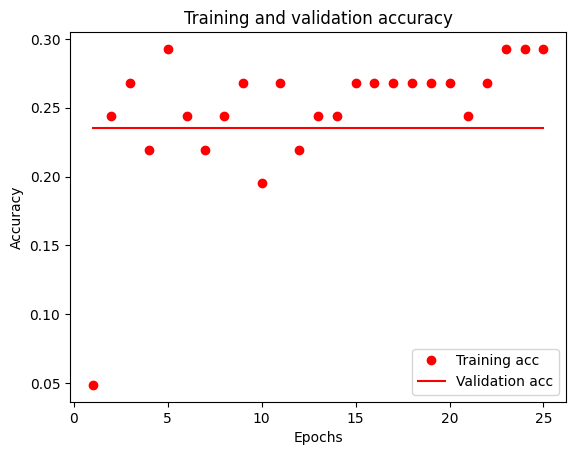

In [80]:
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

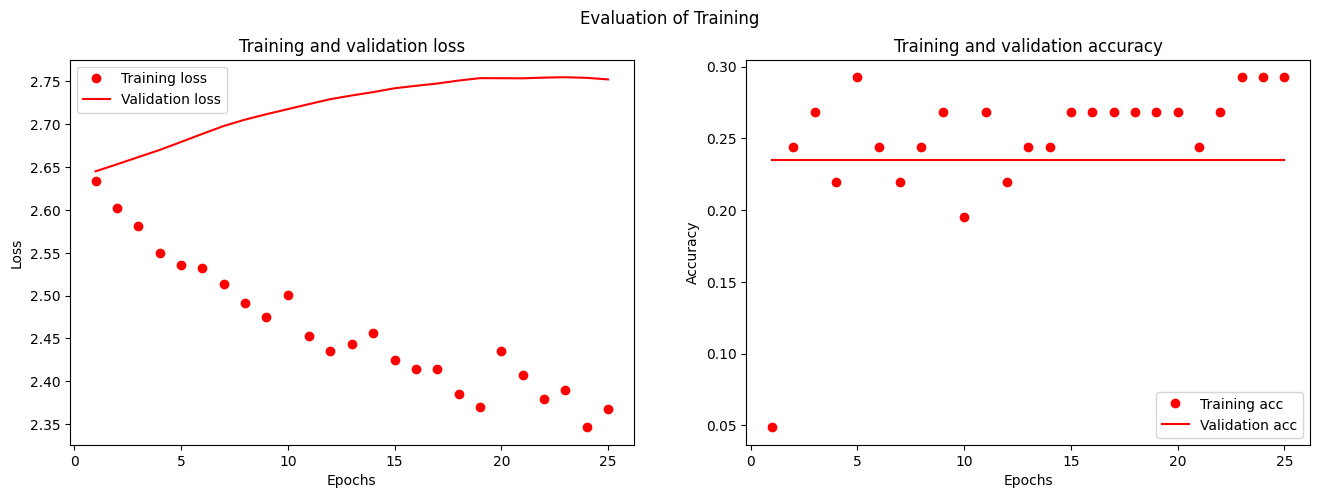

In [81]:
# better design
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16, 5)
fig.suptitle("Evaluation of Training")

axs[0].plot(epochs, loss, 'ro', label='Training loss')
axs[0].plot(epochs, val_loss, 'r', label='Validation loss')
axs[0].set_title('Training and validation loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(epochs, acc, 'ro', label='Training acc')
axs[1].plot(epochs, val_acc, 'r', label='Validation acc')
axs[1].set_title('Training and validation accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='lower right')


# Export Model and explore

In [82]:
final_model = model_t.add_vec_to_model(model, vectorize_layer)

examples = tf.constant([
    """Ordered, That no Bills, other than Government Bills, 
    be introduced in anticipation of the Ballot, and that all 
    Members who desire to ballot, whether for Bills or for Motions for
    Wednesdays the 30th November, 7th, 14th, and 21st December, do hand in
    their names at the Table during the Sitting of the House on Tuesday 
    22nd November or Wednesday 23rd November; and that a copy of the notice 
    of such Bill or Motion be handed in at the latest during the Sitting of 
    the House on Thursday the 24th November. """,
    """Colonel Sir Walter Smiles, supported by Colonel Sir Kenyan, 
    Vaughan-Morgan, Captain Bill Elliston, Mr. Rosbotham, Mr. Richard 
    Russell, Sir Walter Greaves-Lord, Miss Horsbrugh, Mr. Buchan, Mr. 
    Alexander Ramsay, and Mr. Cocks, presented a Bill to provide for the 
    licensing of Dog-racing courses: And the same was ordered to be read a 
    second time upon Friday next; and to be printed"""
])

In [83]:
predictions = final_model.predict(examples)

for i, prediction in enumerate(predictions):
    print("Prediction", i)
    for i, p in enumerate(prediction):
        print("example is a", tf_train_data.class_names[i], "with a certainty of", p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Prediction 0
example is a Adjournment of Debate with a certainty of 0.62940836
example is a Appointment of Committees with a certainty of 0.63780767
example is a Division of the House with a certainty of 0.58500147
example is a Message from Royalty or Lords with a certainty of 0.61346567
example is a Motion for leave to bring Bill with a certainty of 0.6675151
example is a Motion for leave to bring in a Bill with a certainty of 0.62225777
example is a Motion withdrawn with a certainty of 0.586339
example is a Order with a certainty of 0.6317985
example is a Petition with a certainty of 0.6008383
example is a Petition for leave to bring bill with a certainty of 0.6129016
example is a Reading of a Bill with a certainty of 0.66995937
example is a Reading of a Petition with a certainty of 0.58124095
example is a Reading of a Report with a certainty of 0.593656
example is a Resolution with a certainty of 0.6841792
Prediction 1
example is a Adjournment o

Prediction 0
with a certainty of 0.6867185235023499 example is a Resolution
Prediction 1
with a certainty of 0.6867185235023499 example is a Resolution


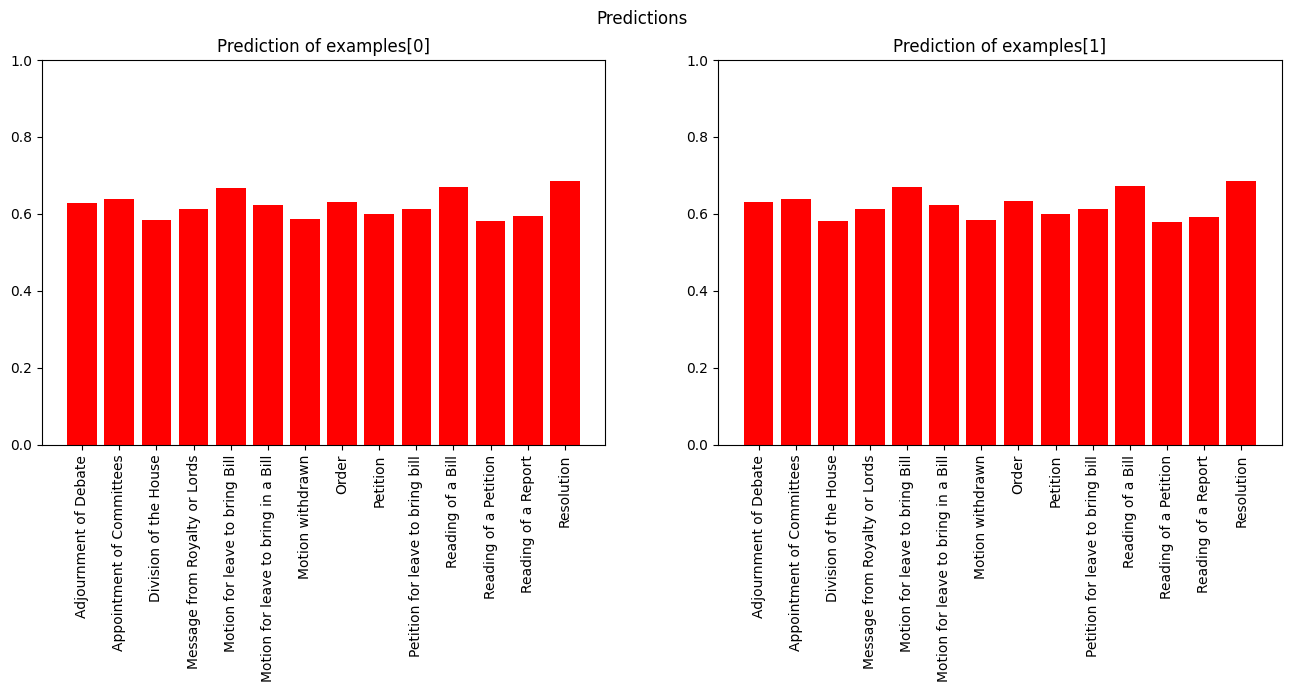

In [84]:
for index, predicition in enumerate(predictions):
    print(f"Prediction {index}")
    max_i = 0
    max_p = 0.0
    for i, p in enumerate(prediction):
        if p > max_p:
            max_p = p
            max_i = i
    print(f"with a certainty of {max_p} example is a {tf_train_data.class_names[max_i]}")

fig, axs = plt.subplots(1, len(predictions))
fig.set_size_inches(16, 5)
fig.suptitle("Predictions")
for index, prediction in enumerate(predictions):
    axs[index].bar(tf_train_data.class_names, prediction, color='red')
    axs[index].set_title(f"Prediction of examples[{index}]")
    axs[index].set(ylim=(0,1))
    axs[index].tick_params(axis='x', labelrotation=90)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction 0
with a certainty of 0.6867185235023499 example is a Resolution
Prediction 1
with a certainty of 0.6867185235023499 example is a Resolution


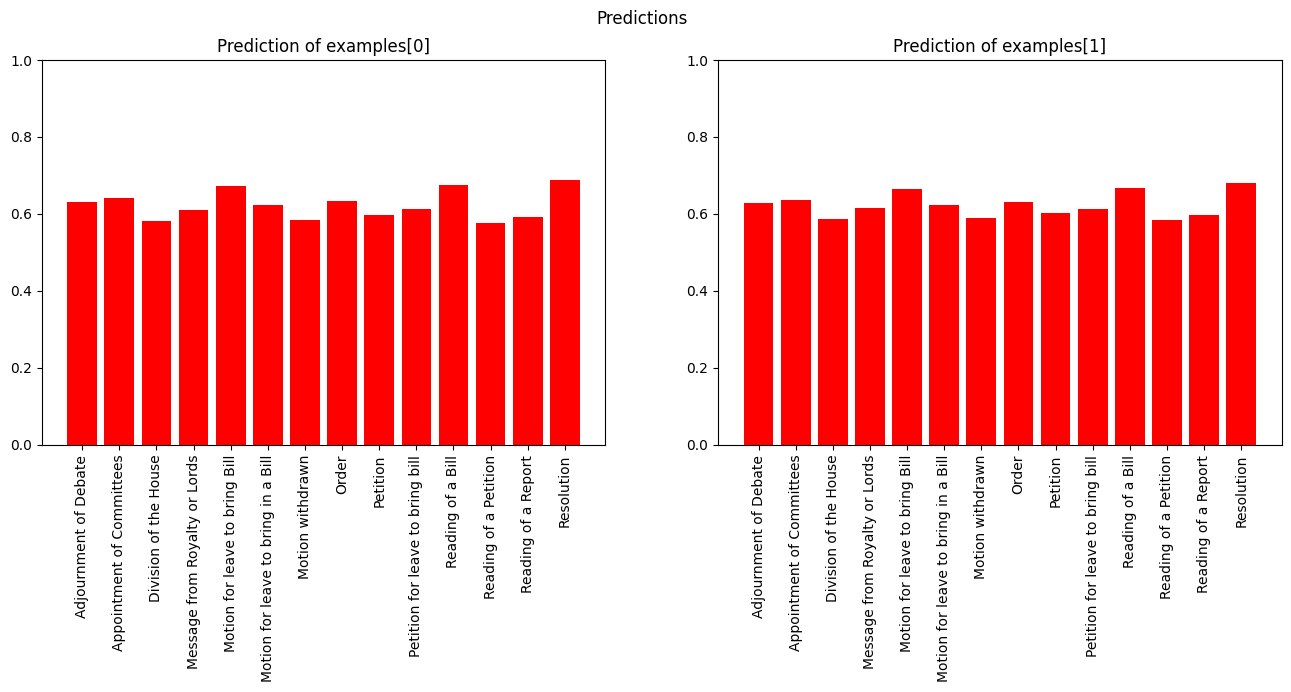

In [85]:
examples = tf.constant([
    """Mr. Thomas Williams presented, pursuant to the directions of an Act 
    of Parliament,Copy of an Order, dated 21st July 1945, entitled the 
    Sea-Fishing Industry (Restriction of Fishing in Northern Waters) 
    Suspension Order, 1945. Ordered, That the said Paper do lie upon the 
    Table.""",
    """Ordered, That a Bill be brought in upon the said Resolution: And 
    that Mr. Thomas, development. Sir Oswald Mosley, Mr. Pethick-Lawrence, 
    and Mr. Lunn do prepare and bring it in. Mr. Lunn accordingly presented 
    a Bill to authorise the making of advances for aiding Development and 
    developing agriculture and industry in certain Colonies and 
    Territories; to provide for the extension of the Colonial Stock Acts, 
    1877 to 1900, to stock forming part of the public debt of certain 
    protected and mandated Territories; and to amend the Palestine and East 
    Africa Loans Act, 1926, and section eleven of the Trusts (Scotland) 
    Act, 1921 : And the same was read the first time, and ordered to be 
    read a second time upon Wednesday next; and to be printed."""
])

predictions = final_model.predict(examples)

for index, predicition in enumerate(predictions):
    print(f"Prediction {index}")
    max_i = 0
    max_p = 0.0
    for i, p in enumerate(prediction):
        if p > max_p:
            max_p = p
            max_i = i
    print(f"with a certainty of {max_p} example is a {tf_train_data.class_names[max_i]}")


fig, axs = plt.subplots(1, len(predictions))
fig.set_size_inches(16, 5)
fig.suptitle("Predictions")
for index, prediction in enumerate(predictions):
    axs[index].bar(tf_train_data.class_names, prediction, color='red')
    axs[index].set_title(f"Prediction of examples[{index}]")
    axs[index].set(ylim=(0,1))
    axs[index].tick_params(axis='x', labelrotation=90)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction 0
with a certainty of 0.6801952123641968 example is a Resolution
Prediction 1
with a certainty of 0.6801952123641968 example is a Resolution


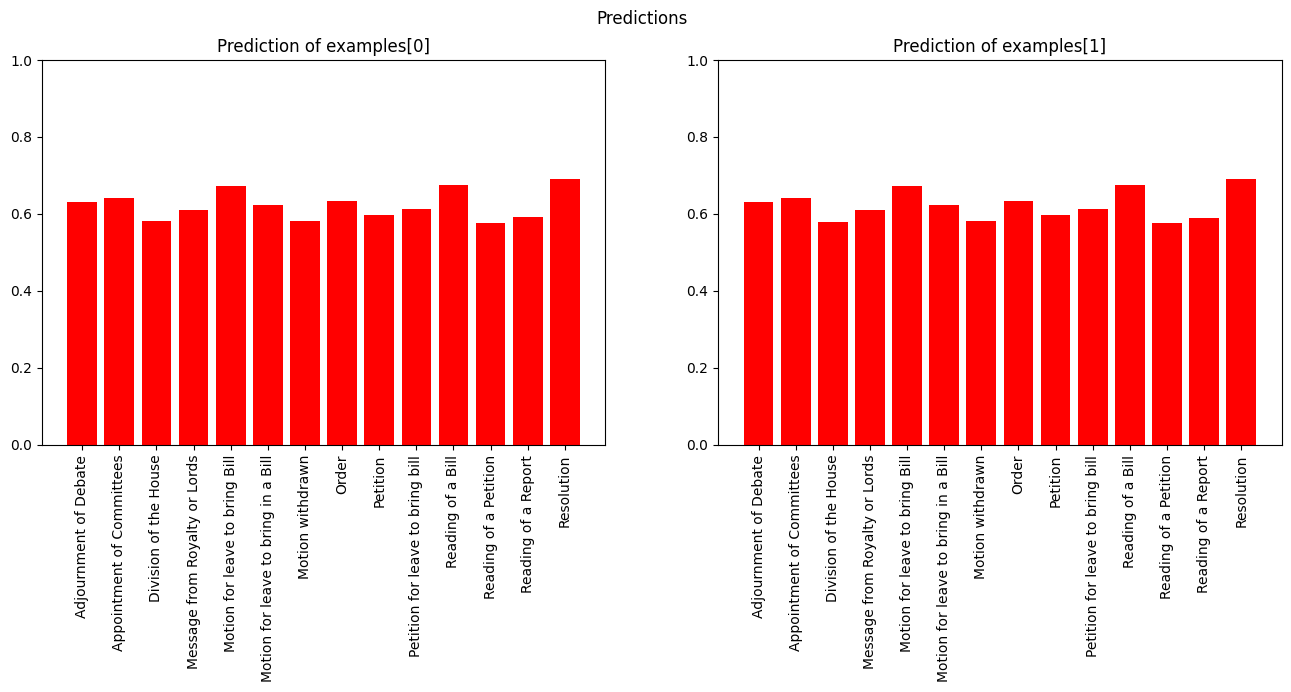

In [86]:
examples = tf.constant([
    """Ordered, That leave be given to bring in a Bill to suspend the operation of the said Acts: And that Lord John Russell and Mr. Solicitor General do prepare, and bring it in.""",
    """A Motion was made, and the Question was proposed, That the Debate be now adjourned: And the said Motion was, with leave of the House, withdrawn."""
])

predictions = final_model.predict(examples)

for index, predicition in enumerate(predictions):
    print(f"Prediction {index}")
    max_i = 0
    max_p = 0.0
    for i, p in enumerate(prediction):
        if p > max_p:
            max_p = p
            max_i = i
    print(f"with a certainty of {max_p} example is a {tf_train_data.class_names[max_i]}")


fig, axs = plt.subplots(1, len(predictions))
fig.set_size_inches(16, 5)
fig.suptitle("Predictions")
for index, prediction in enumerate(predictions):
    axs[index].bar(tf_train_data.class_names, prediction, color='red')
    axs[index].set_title(f"Prediction of examples[{index}]")
    axs[index].set(ylim=(0,1))
    axs[index].tick_params(axis='x', labelrotation=90)

In [87]:
# Test it with `raw_test_ds`, which yields raw strings
metrics = final_model.evaluate(tf_train_data, return_dict=True)
print(metrics)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2726 - loss: 2.5349  
{'accuracy': 0.26829269528388977, 'loss': 2.5389132499694824}


In [88]:
# save model to disk as .keras

Path("out/").mkdir(parents=True, exist_ok=True)
final_model.save('out/parlamentary_actions_cat.keras')

In [89]:
"""
# reload model snippet
new_model = tf.keras.models.load_model('out/parlamentary_actions_cat.keras')

# Show the model architecture
new_model.summary()
"""

"\n# reload model snippet\nnew_model = tf.keras.models.load_model('out/parlamentary_actions_cat.keras')\n\n# Show the model architecture\nnew_model.summary()\n"